In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Path to SledgeHAMR top directory
sys.path.append('../../')
import pySledgeHAMR as sh

### Create Initial State

In [3]:
strings = sh.AxionStrings()
strings.CreateInitialState(L=23, N=128, k_max=5, t_start=0.1, output_file='initial_state.hdf5') 

Generate Psi1...
Generate Psi2...
Generate Pi1...
Generate Pi2...
Done.


### Read Output

In [4]:
out = sh.Output('output')

times = out.GetTimesOfSlices()
print('times:',times)

Number of slices found:  2
times: [0.2078125 0.4234375]


## Plot Slice

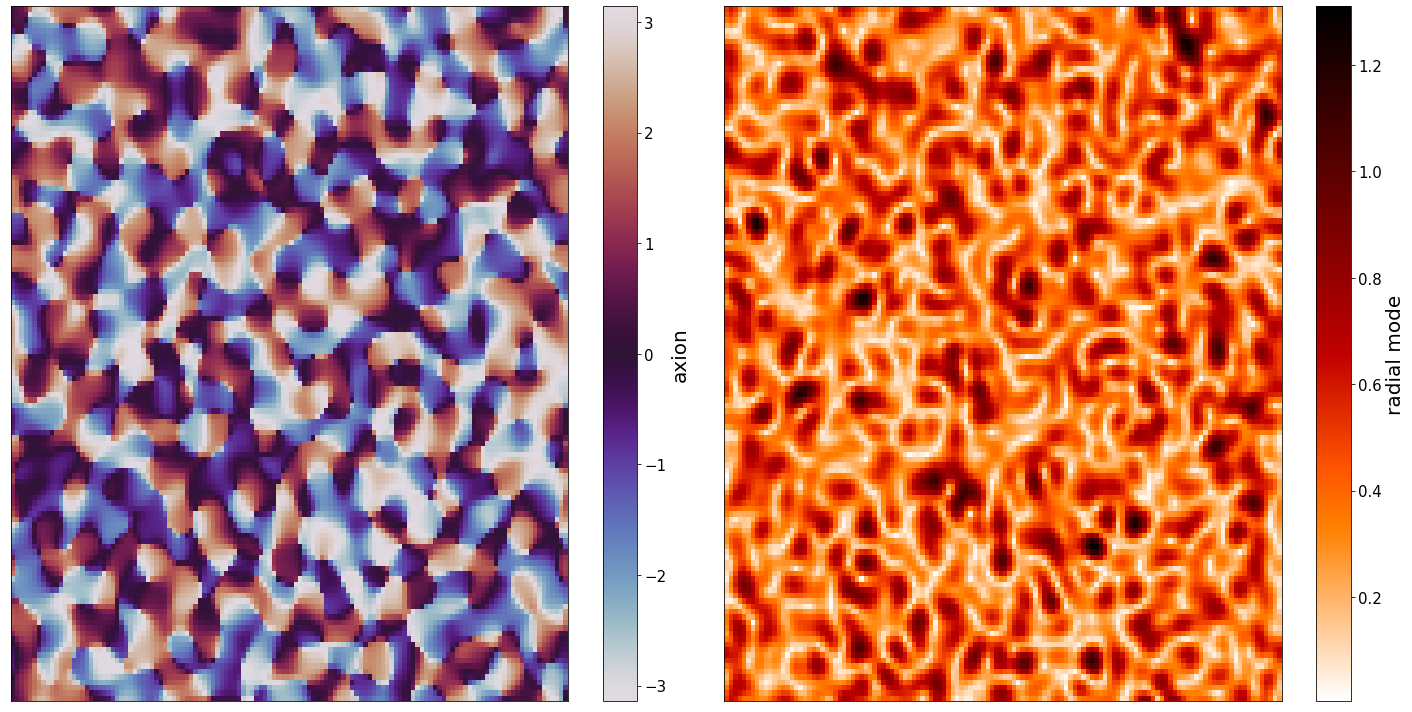

In [5]:
# id of slice to be plotted
i = 0

# Read Slice
slices = out.GetSlices(i, 'x', 0, ['Psi1', 'Psi2'])
t = slices['t']
axion = np.arctan2(slices['Psi2'], slices['Psi1'])
radial_mode = np.sqrt(slices['Psi1']**2 + slices['Psi2']**2)

# Plot
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

dim = np.shape(axion)[0]
axis = np.linspace(0,1,dim)
im = ax[0].pcolormesh(axis,axis,axion,
                      cmap='twilight',vmin=-np.pi,vmax=np.pi)
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label='axion',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].pcolormesh(axis,axis,radial_mode,cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label='radial mode',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()